In [5]:
import tensorflow as tf
import keras 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
import os
import zipfile

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

In [8]:
zip_ref = zipfile.ZipFile('cats_and_dogs_filtered.zip','r')
zip_ref.extractall()
zip_ref.close()

In [97]:
base = 'cats_and_dogs_filtered'

train_dir = os.path.join(base,'train')
validation_dir = os.path.join(base,'validation')

train_dir_cats = os.path.join(train_dir,'cats')
train_dir_dogs = os.path.join(train_dir,'dogs')

validation_dir_cats = os.path.join(validation_dir,'cats')
validation_dir_dogs = os.path.join(validation_dir,'dogs')

In [98]:
train_cat_names = os.listdir(train_dir_cats)
train_dog_names = os.listdir(train_dir_dogs)

validation_cat_names = os.listdir(validation_dir_cats)
validation_dog_names = os.listdir(validation_dir_dogs)

print(len(train_cat_names),len(train_dog_names), len(validation_cat_names),len(validation_dog_names))

1000 1000 500 500


In [42]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape=[150,150,3]),
    MaxPool2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [43]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [45]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size= 20,
    class_mode='binary',
    target_size = (150,150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size= 20,
    class_mode= 'binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    verbose = 1,
    validation_data= validation_generator,
    validation_steps= 50,
    epochs = 15
)

Epoch 1/15
100/100 [==============================] - 22s 217ms/step - loss: 0.7203 - accuracy: 0.5560 - val_loss: 0.6229 - val_accuracy: 0.6690
Epoch 2/15
100/100 [==============================] - 26s 255ms/step - loss: 0.5924 - accuracy: 0.6770 - val_loss: 0.5882 - val_accuracy: 0.6780
Epoch 3/15
100/100 [==============================] - 24s 239ms/step - loss: 0.5281 - accuracy: 0.7350 - val_loss: 0.7116 - val_accuracy: 0.6090
Epoch 4/15
100/100 [==============================] - 28s 279ms/step - loss: 0.4611 - accuracy: 0.7835 - val_loss: 0.5727 - val_accuracy: 0.6980
Epoch 5/15
100/100 [==============================] - 28s 285ms/step - loss: 0.3754 - accuracy: 0.8315 - val_loss: 0.6724 - val_accuracy: 0.6940
Epoch 6/15
100/100 [==============================] - 26s 265ms/step - loss: 0.2830 - accuracy: 0.8830 - val_loss: 0.6887 - val_accuracy: 0.7220
Epoch 7/15
100/100 [==============================] - 31s 310ms/step - loss: 0.1997 - accuracy: 0.9210 - val_loss: 0.8452 - val_ac

[0.]


cat-1045782__340.jpg is a cat
[0.]


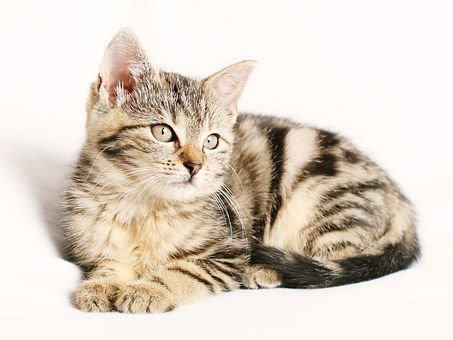

cat-1192026__340.jpg is a cat
[1.]


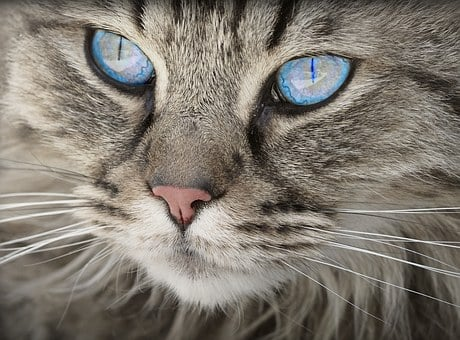

cat-1508613__340.jpg is a dog
[1.]


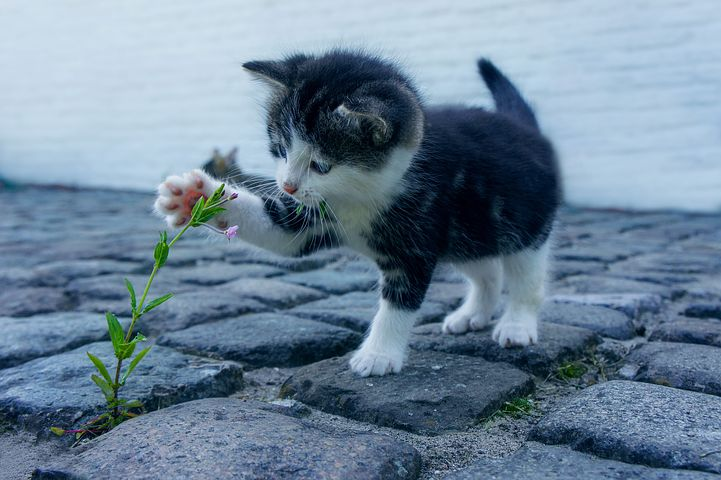

cat-2536662__480.jpg is a dog
[0.]


cat-4611189__340.jpg is a cat
[1.]


dachshund-1519374__480.jpg is a dog
[1.]


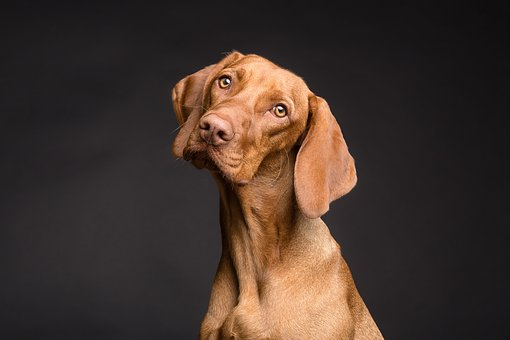

dog-3277416__340.jpg is a dog
[1.]


dog-4415649__340.jpg is a dog
[0.]


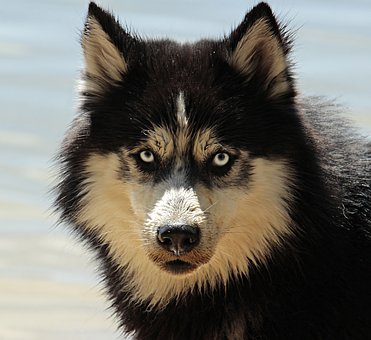

husky-3380548__340.jpg is a cat
[1.]


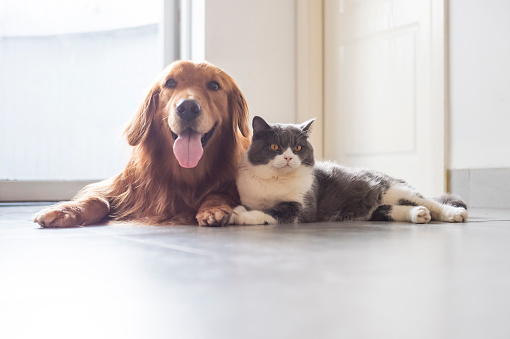

istockphoto-1159973303-170667a.jpg is a dog
[0.]


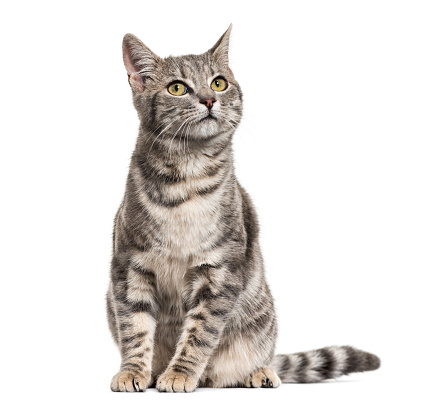

istockphoto-1217828258-170667a.jpg is a cat
[1.]


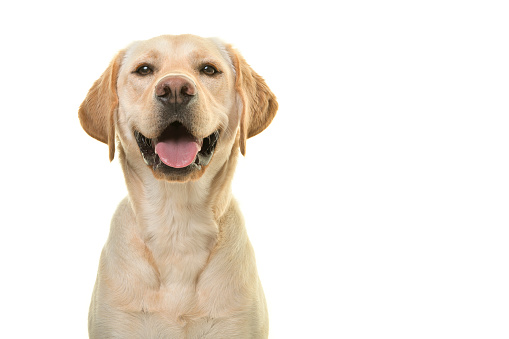

istockphoto-1251033537-170667a.jpg is a dog
[0.]


istockphoto-1267021092-170667a.jpg is a cat
[1.]


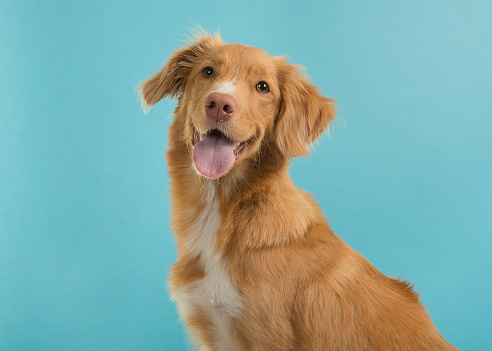

istockphoto-1273382787-170667a.jpg is a dog
[1.]


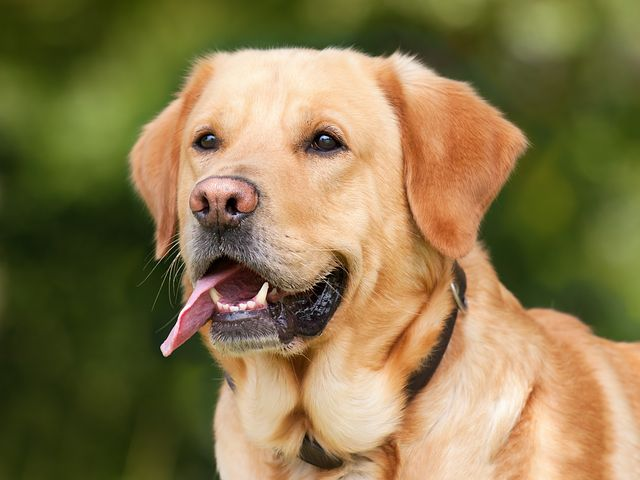

labrador-retriever-1210559__480.jpg is a dog
[1.]


pug-690566__340.jpg is a dog
[1.]


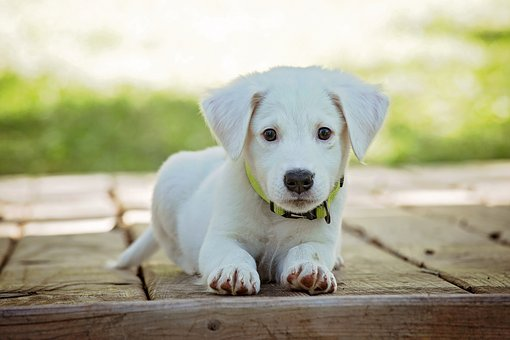

puppy-1903313__340.jpg is a dog
[1.]


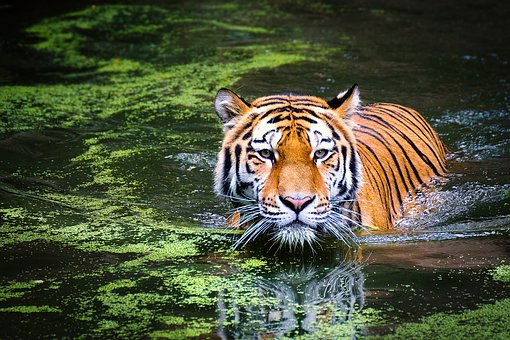

tiger-2535888__340.jpg is a dog


In [47]:
from IPython.display import Image
from keras.preprocessing import image
test = os.listdir('testforcatsvdogs')
for loc in test:
    img_path = os.path.join('testforcatsvdogs',loc)
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        display(Image(filename=img_path))
        print (loc + ' is a dog')
    else:
        display(Image(filename=img_path))
        print (loc + ' is a cat')
        

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

Text(0.5, 1.0, 'Loss')

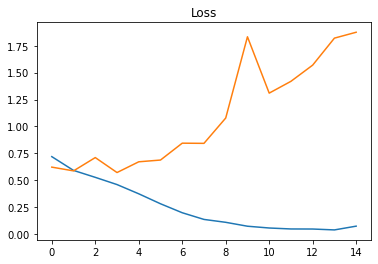

In [49]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

In [82]:
try:
    classes = ['cats','dogs']
    parent_dir = os.path.join(os.getcwd(),'cats-v-dogs')
    os.mkdir(parent_dir)
    
    train_dir = os.path.join(parent_dir,'training')
    os.mkdir(train_dir)
    
    test_dir = os.path.join(parent_dir,'testing')
    os.mkdir(test_dir)
    
    for class_name in classes:
      ### START CODE HERE
        a = train_dir+'/'+class_name
        os.mkdir(a)
        
        b = test_dir+'/'+class_name
        os.mkdir(b)
        
### END CODE HERE
except OSError:
    pass

In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "cats-and-dogs.zip"

local_zip = 'cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [87]:
import random
from shutil import copyfile

In [88]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = os.listdir(SOURCE)
    files = random.sample(files, len(files))
    x=0
    for file in files:
        if os.path.getsize(os.path.join(SOURCE,file))==0:
            print(file + ' is zero length, so ignoring')
            files.remove(file)
    for file in files:
        if x < SPLIT_SIZE*len(files):
            copyfile(os.path.join(SOURCE,file),os.path.join(TRAINING,file))
            x+=1
        else:
            copyfile(os.path.join(SOURCE,file), os.path.join(TESTING, file))
    

  

CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [89]:
print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [91]:
model1 = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [93]:
TRAINING_DIR = 'cats-v-dogs/training'
VALIDATION_DIR = 'cats-v-dogs/testing'

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=100,
    target_size = (150,150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=100,
    target_size = (150,150),
    class_mode='binary'
)

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [94]:
history = model1.fit(
    train_generator,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=25,
    epochs = 15,
    verbose = 2
)

Epoch 1/15
100/100 - 152s - loss: 0.7506 - accuracy: 0.5992 - val_loss: 0.5853 - val_accuracy: 0.7139
Epoch 2/15
100/100 - 125s - loss: 0.5831 - accuracy: 0.6970 - val_loss: 0.5197 - val_accuracy: 0.7407
Epoch 3/15
100/100 - 119s - loss: 0.5289 - accuracy: 0.7397 - val_loss: 0.4958 - val_accuracy: 0.7575
Epoch 4/15


C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:811: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 - 147s - loss: 0.4788 - accuracy: 0.7693 - val_loss: 0.4864 - val_accuracy: 0.7687
Epoch 5/15
100/100 - 113s - loss: 0.4439 - accuracy: 0.7926 - val_loss: 0.4827 - val_accuracy: 0.7611
Epoch 6/15
100/100 - 123s - loss: 0.4252 - accuracy: 0.8049 - val_loss: 0.6169 - val_accuracy: 0.7315
Epoch 7/15
100/100 - 110s - loss: 0.3824 - accuracy: 0.8301 - val_loss: 0.4415 - val_accuracy: 0.8019
Epoch 8/15
100/100 - 134s - loss: 0.3558 - accuracy: 0.8374 - val_loss: 0.4369 - val_accuracy: 0.8095
Epoch 9/15
100/100 - 124s - loss: 0.3257 - accuracy: 0.8543 - val_loss: 0.4671 - val_accuracy: 0.7823
Epoch 10/15
100/100 - 131s - loss: 0.2973 - accuracy: 0.8728 - val_loss: 0.4847 - val_accuracy: 0.7951
Epoch 11/15
100/100 - 105s - loss: 0.2661 - accuracy: 0.8894 - val_loss: 0.4763 - val_accuracy: 0.8175
Epoch 12/15
100/100 - 105s - loss: 0.2411 - accuracy: 0.8980 - val_loss: 0.4703 - val_accuracy: 0.8199
Epoch 13/15
100/100 - 109s - loss: 0.2074 - accuracy: 0.9181 - val_loss: 0.4637 - val_accu

Text(0.5, 1.0, 'Loss')

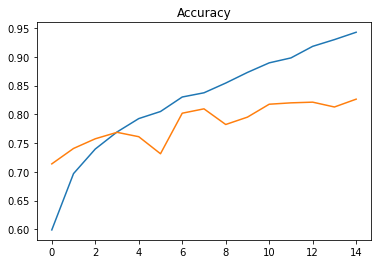

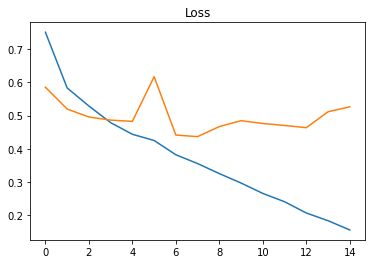

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

[0.99990094]


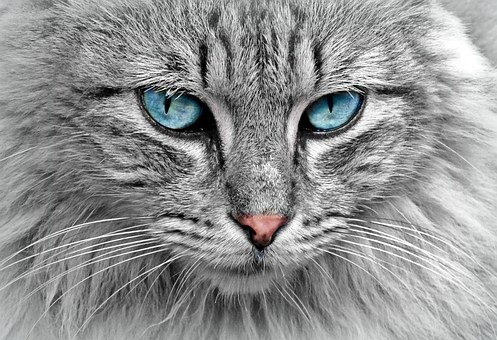

cat-1045782__340.jpg is a dog
[0.]


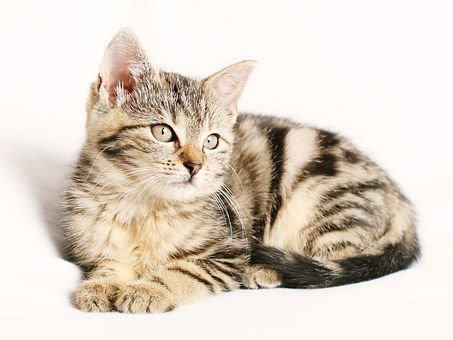

cat-1192026__340.jpg is a cat
[0.]


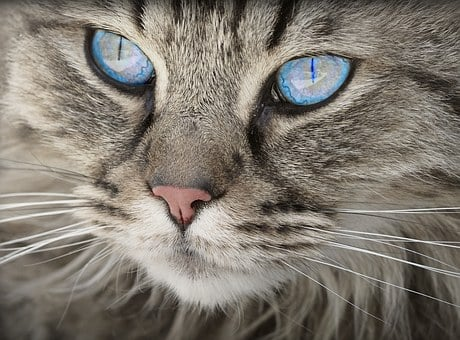

cat-1508613__340.jpg is a cat
[1.]


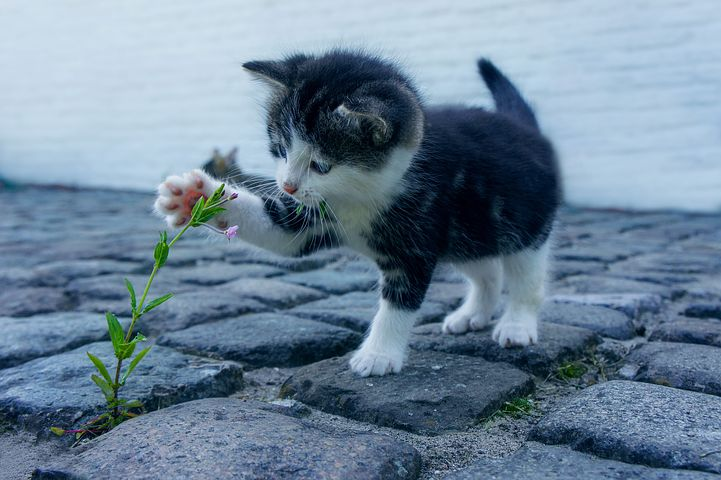

cat-2536662__480.jpg is a dog
[0.]


cat-4611189__340.jpg is a cat
[1.]


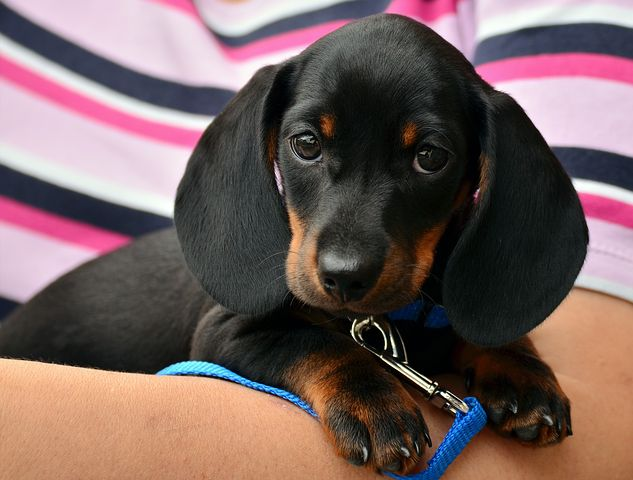

dachshund-1519374__480.jpg is a dog
[1.]


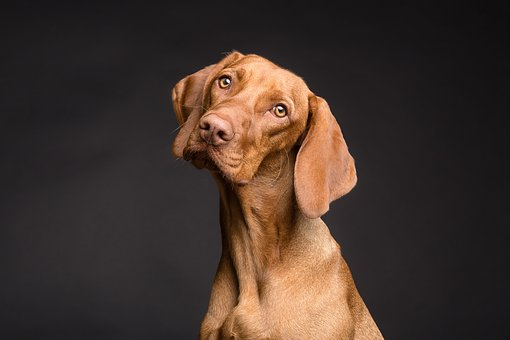

dog-3277416__340.jpg is a dog
[1.]


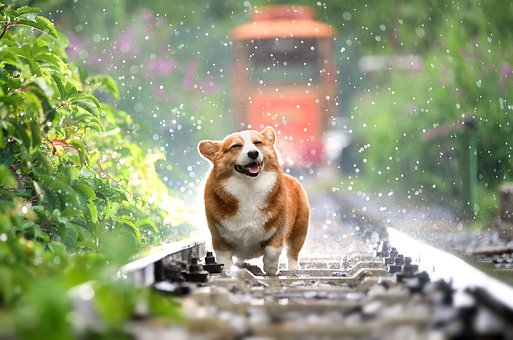

dog-4415649__340.jpg is a dog
[1.]


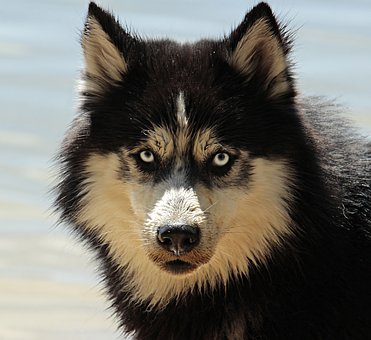

husky-3380548__340.jpg is a dog
[1.]


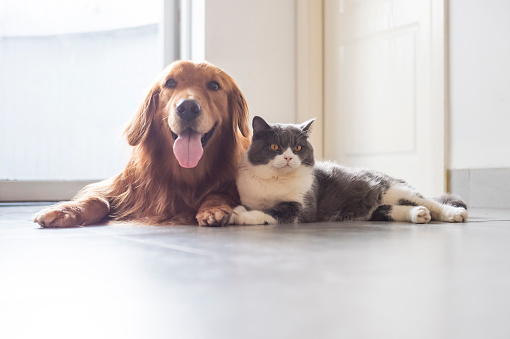

istockphoto-1159973303-170667a.jpg is a dog
[0.]


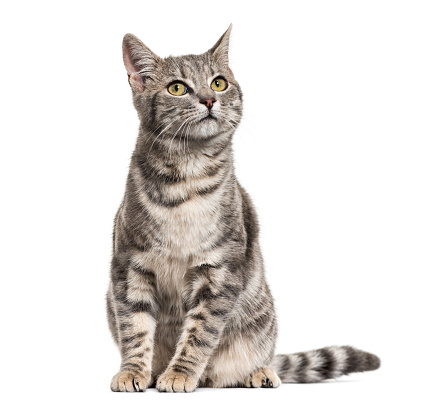

istockphoto-1217828258-170667a.jpg is a cat
[1.]


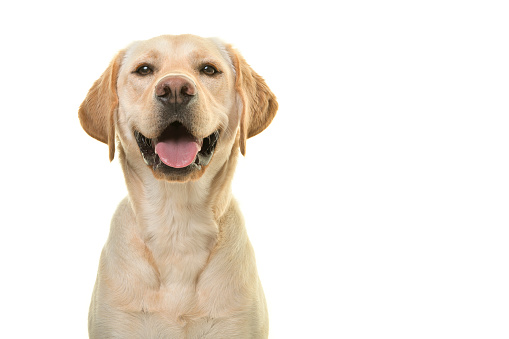

istockphoto-1251033537-170667a.jpg is a dog
[0.]


istockphoto-1267021092-170667a.jpg is a cat
[1.]


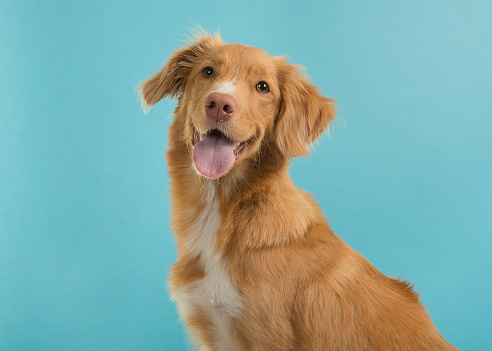

istockphoto-1273382787-170667a.jpg is a dog
[1.]


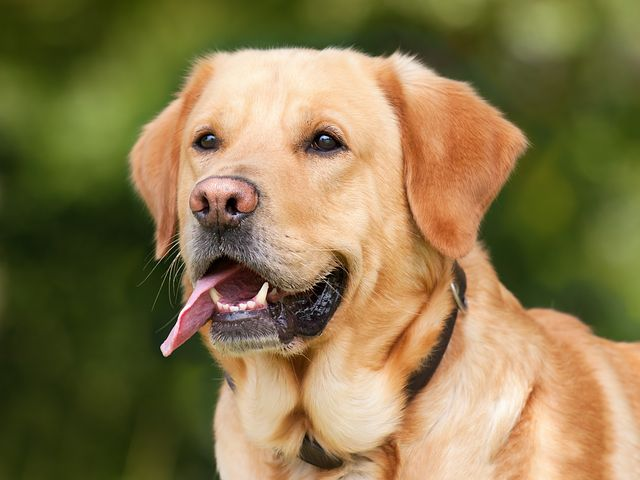

labrador-retriever-1210559__480.jpg is a dog
[1.]


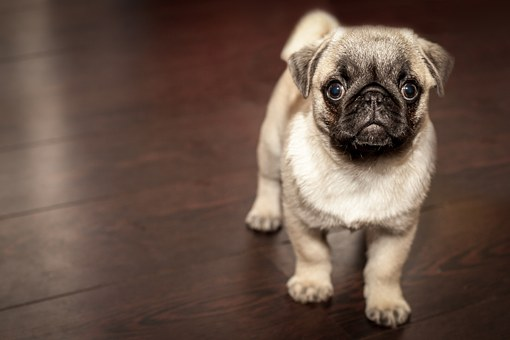

pug-690566__340.jpg is a dog
[1.]


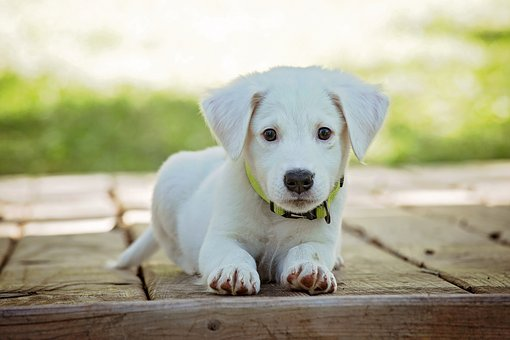

puppy-1903313__340.jpg is a dog
[1.]


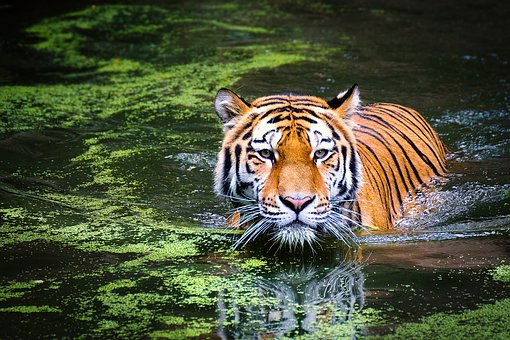

tiger-2535888__340.jpg is a dog


In [96]:
from IPython.display import Image
from keras.preprocessing import image
test = os.listdir('testforcatsvdogs')
for loc in test:
    img_path = os.path.join('testforcatsvdogs',loc)
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model1.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        display(Image(filename=img_path))
        print (loc + ' is a dog')
    else:
        display(Image(filename=img_path))
        print (loc + ' is a cat')
        

In [100]:
model3 = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=1e-4),metrics=['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 128)      

In [102]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size = (150,150),
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)
history = model3.fit(
    train_generator,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1,
    epochs=100
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 46s 462ms/step - loss: 0.6880 - accuracy: 0.5380 - val_loss: 0.6820 - val_accuracy: 0.5060
Epoch 2/100
100/100 [==============================] - 43s 431ms/step - loss: 0.6774 - accuracy: 0.5665 - val_loss: 0.6446 - val_accuracy: 0.6310
Epoch 3/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6633 - accuracy: 0.5895 - val_loss: 0.6186 - val_accuracy: 0.6580
Epoch 4/100
100/100 [==============================] - 51s 506ms/step - loss: 0.6423 - accuracy: 0.6165 - val_loss: 0.5984 - val_accuracy: 0.6730
Epoch 5/100
100/100 [==============================] - 44s 440ms/step - loss: 0.6373 - accuracy: 0.6325 - val_loss: 0.5926 - val_accuracy: 0.6880
Epoch 6/100
100/100 [==============================] - 48s 475ms/step - loss: 0.6214 - accuracy: 0.6440 - val_loss: 0.5929 - val_accuracy: 0.6740
Epoch 7/100
100/100 [===================

Text(0.5, 1.0, 'Loss')

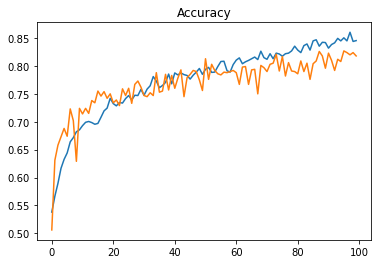

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

[1.]


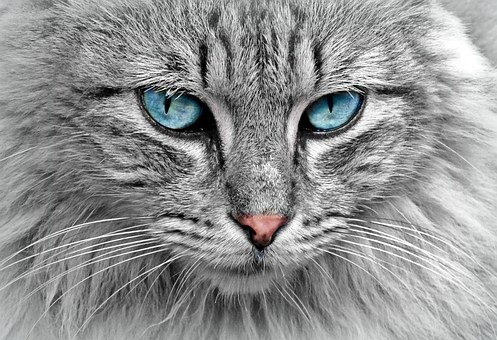

cat-1045782__340.jpg is a dog
[0.]


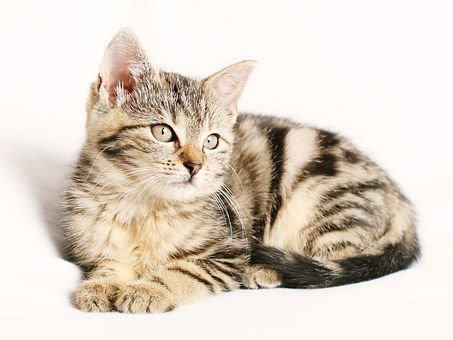

cat-1192026__340.jpg is a cat
[1.]


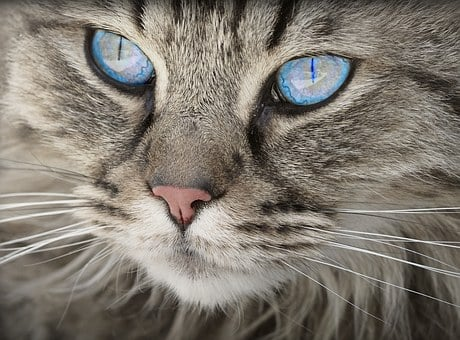

cat-1508613__340.jpg is a dog
[0.]


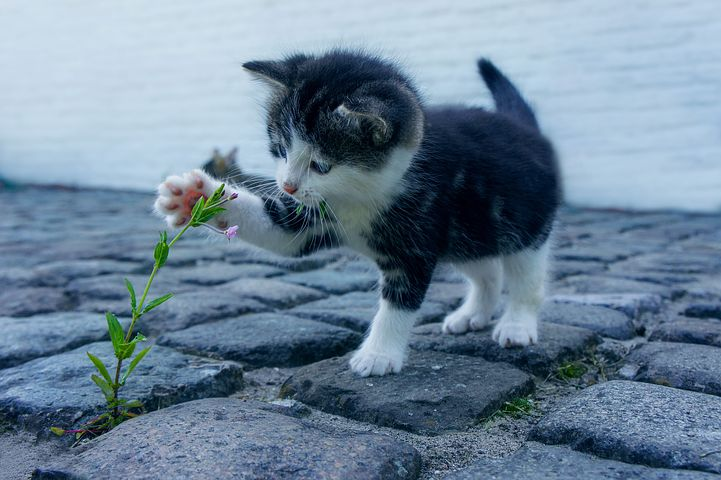

cat-2536662__480.jpg is a cat
[0.]


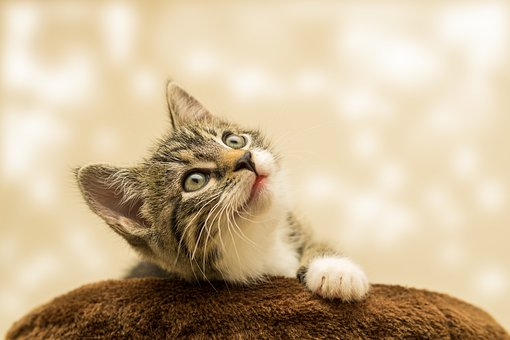

cat-4611189__340.jpg is a cat
[1.]


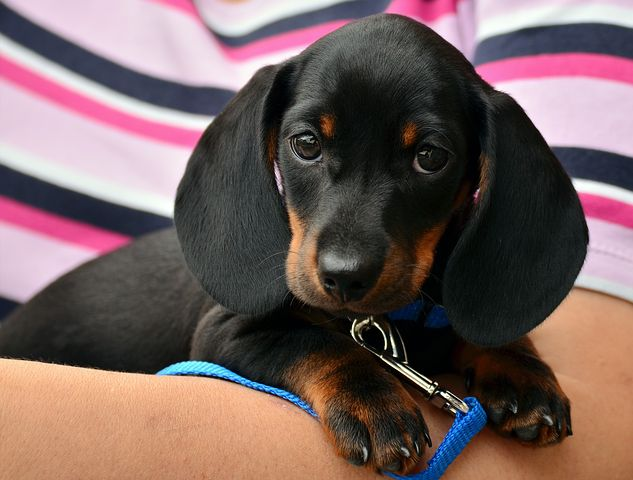

dachshund-1519374__480.jpg is a dog
[1.]


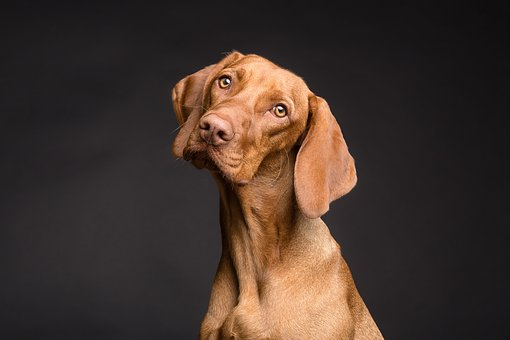

dog-3277416__340.jpg is a dog
[1.]


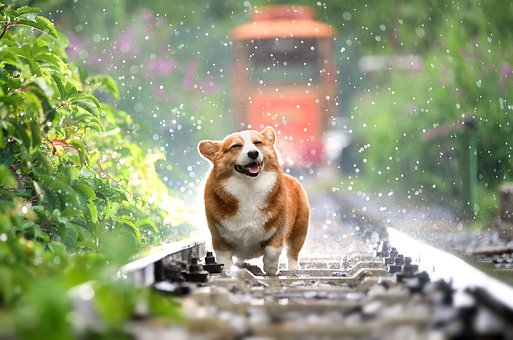

dog-4415649__340.jpg is a dog
[1.]


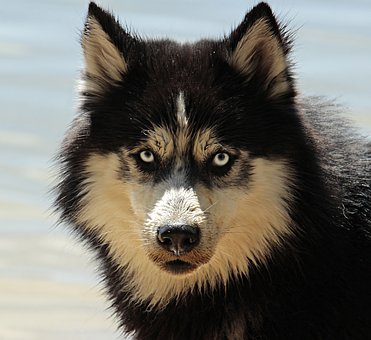

husky-3380548__340.jpg is a dog
[1.]


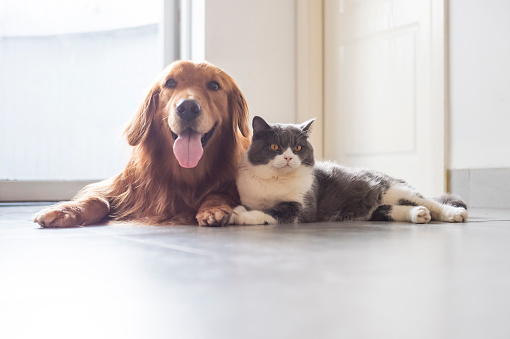

istockphoto-1159973303-170667a.jpg is a dog
[0.]


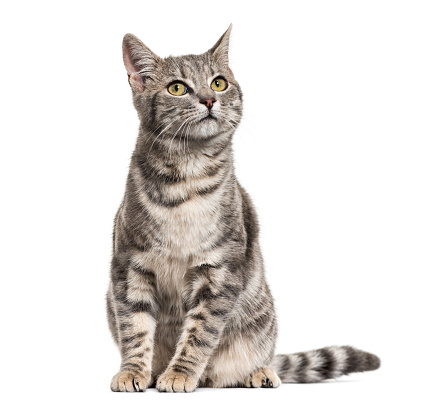

istockphoto-1217828258-170667a.jpg is a cat
[1.]


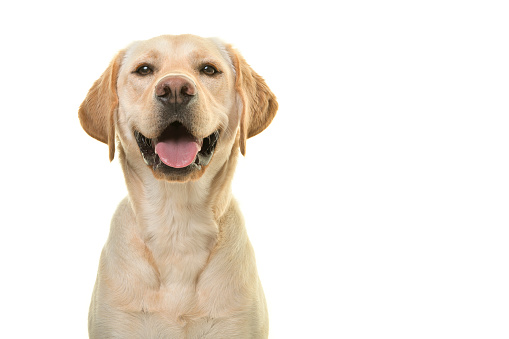

istockphoto-1251033537-170667a.jpg is a dog
[0.]


istockphoto-1267021092-170667a.jpg is a cat
[1.]


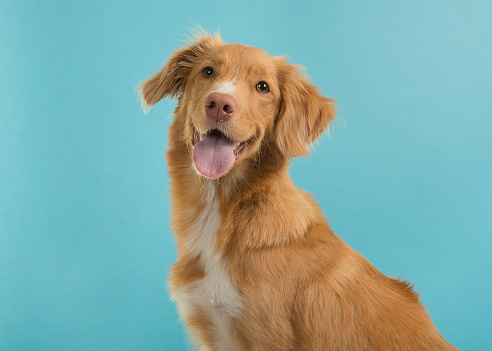

istockphoto-1273382787-170667a.jpg is a dog
[1.]


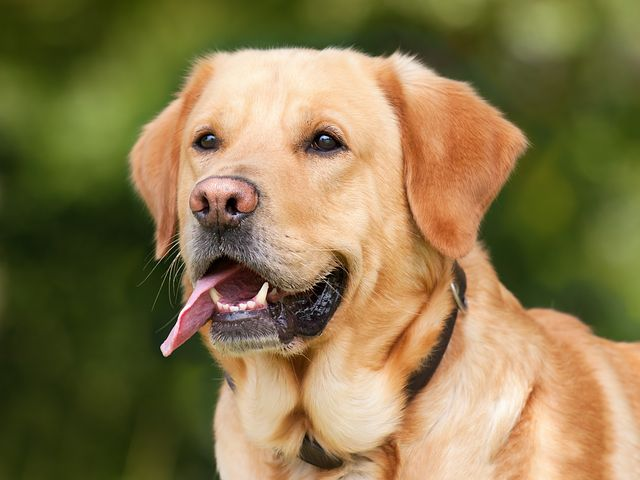

labrador-retriever-1210559__480.jpg is a dog
[1.]


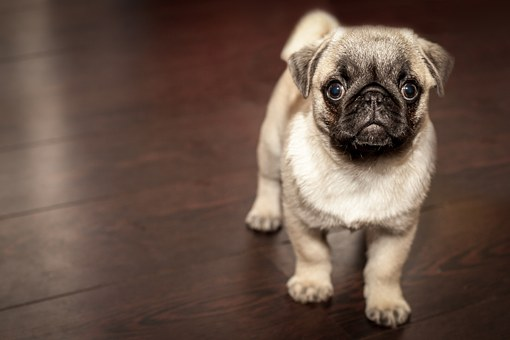

pug-690566__340.jpg is a dog
[1.]


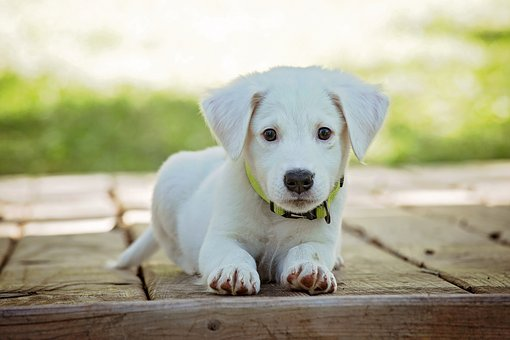

puppy-1903313__340.jpg is a dog
[1.]


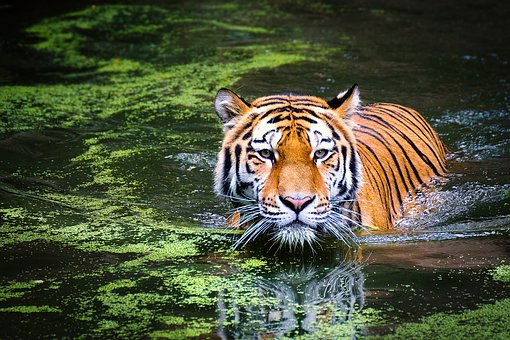

tiger-2535888__340.jpg is a dog
[1.]


toughest.jpg is a dog


In [104]:
test = os.listdir('testforcatsvdogs')
for loc in test:
    img_path = os.path.join('testforcatsvdogs',loc)
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model3.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        display(Image(filename=img_path))
        print (loc + ' is a dog')
    else:
        display(Image(filename=img_path))
        print (loc + ' is a cat')
        

In [105]:
from keras import layers
from keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  

--2021-08-27 16:20:51--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.195.144, 142.250.195.176, 142.250.195.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.195.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

     0K .......... .......... .......... .......... ..........  0% 1.13M 74s
    50K .......... .......... .......... .......... ..........  0% 2.31M 55s
   100K .......... .......... .......... .......... ..........  0% 5.13M 42s
   150K .......... .......... .......... .......... ..........  0% 3.38M 38s
   200K .......... .......... .......... .......... ..........  0% 7.86M 32s
   250K .......... .......... .......... .......... ..........  0% 4.34M 30s
   300K .......... .......... ......

 31600K .......... .......... .......... .......... .......... 36% 8.28M 8s
 31650K .......... .......... .......... .......... .......... 36% 7.25M 8s
 31700K .......... .......... .......... .......... .......... 36% 9.37M 8s
 31750K .......... .......... .......... .......... .......... 37% 19.0M 8s
 31800K .......... .......... .......... .......... .......... 37% 4.32M 8s
 31850K .......... .......... .......... .......... .......... 37% 38.8M 8s
 31900K .......... .......... .......... .......... .......... 37% 13.1M 8s
 31950K .......... .......... .......... .......... .......... 37% 8.43M 8s
 32000K .......... .......... .......... .......... .......... 37% 14.5M 8s
 32050K .......... .......... .......... .......... .......... 37% 4.93M 8s
 32100K .......... .......... .......... .......... .......... 37% 6.26M 8s
 32150K .......... .......... .......... .......... .......... 37% 19.7M 8s
 32200K .......... .......... .......... .......... .......... 37% 6.31M 8s
 32250K ....

In [106]:
from keras.applications.inception_v3 import InceptionV3

In [109]:
weights_dir = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(include_top=False,weights=None, input_shape=(150,150,3))

pretrained_model.load_weights(weights_dir) #adding own weights

for layer in pretrained_model.layers:
    layer.trainable = False #locking layers

last_layer = pretrained_model.get_layer('mixed7') #accessing layer we want - refer to shape
print(last_layer.output_shape) #what's the output_shape of our layer
last_output = last_layer.output #calling output so we can continue from here in our neural network

(None, 7, 7, 768)


In [108]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_19[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [110]:
x = Flatten()(last_output)
x = Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = Dense(1, activation = 'sigmoid')(x)

transfer_model = Model(pretrained_model.input,x)

transfer_model.compile(loss='binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics=['accuracy'])

In [112]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=50,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_filtered/train',
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)
validation_generator = test_datagen.flow_from_directory(
    'cats_and_dogs_filtered/validation',
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [113]:
history = transfer_model.fit(
    train_generator,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50,
    epochs=20,
    verbose=2
)

Epoch 1/20
100/100 - 83s - loss: 0.3691 - accuracy: 0.8545 - val_loss: 0.1857 - val_accuracy: 0.9270
Epoch 2/20
100/100 - 68s - loss: 0.2345 - accuracy: 0.9050 - val_loss: 0.1100 - val_accuracy: 0.9610
Epoch 3/20
100/100 - 70s - loss: 0.2238 - accuracy: 0.9185 - val_loss: 0.1021 - val_accuracy: 0.9690
Epoch 4/20
100/100 - 76s - loss: 0.2045 - accuracy: 0.9230 - val_loss: 0.1043 - val_accuracy: 0.9720
Epoch 5/20
100/100 - 78s - loss: 0.2148 - accuracy: 0.9240 - val_loss: 0.1505 - val_accuracy: 0.9540
Epoch 6/20
100/100 - 88s - loss: 0.1909 - accuracy: 0.9310 - val_loss: 0.2160 - val_accuracy: 0.9390
Epoch 7/20
100/100 - 102s - loss: 0.2057 - accuracy: 0.9295 - val_loss: 0.1047 - val_accuracy: 0.9630
Epoch 8/20
100/100 - 103s - loss: 0.1909 - accuracy: 0.9285 - val_loss: 0.1159 - val_accuracy: 0.9700
Epoch 9/20
100/100 - 105s - loss: 0.1942 - accuracy: 0.9325 - val_loss: 0.1085 - val_accuracy: 0.9700
Epoch 10/20
100/100 - 108s - loss: 0.1678 - accuracy: 0.9455 - val_loss: 0.1079 - val_ac

Text(0.5, 1.0, 'Loss')

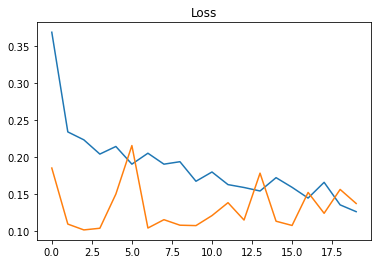

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

[0.]


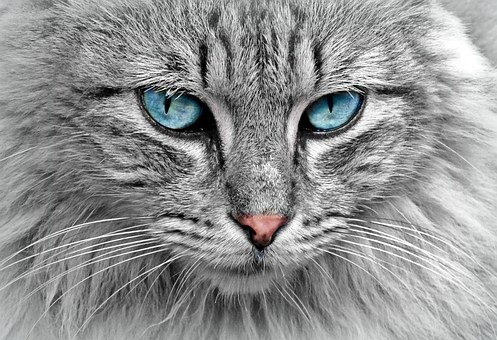

cat-1045782__340.jpg is a cat
[0.]


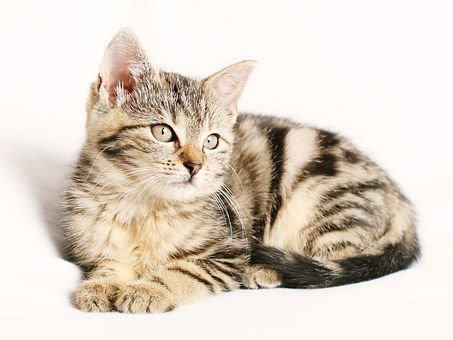

cat-1192026__340.jpg is a cat
[0.]


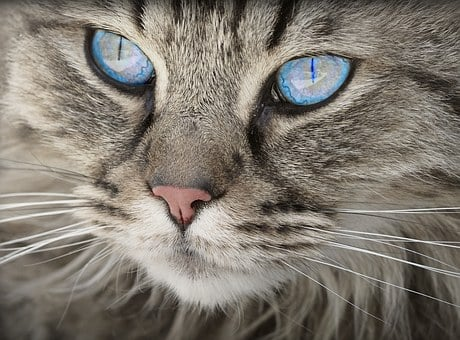

cat-1508613__340.jpg is a cat
[0.]


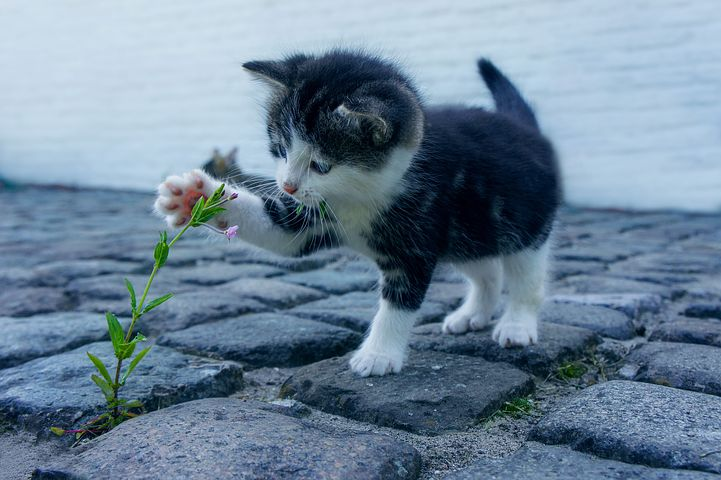

cat-2536662__480.jpg is a cat
[0.]


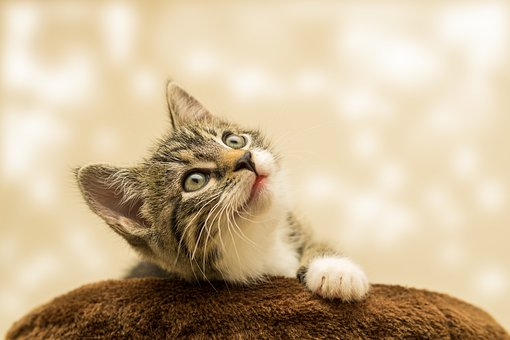

cat-4611189__340.jpg is a cat
[0.]


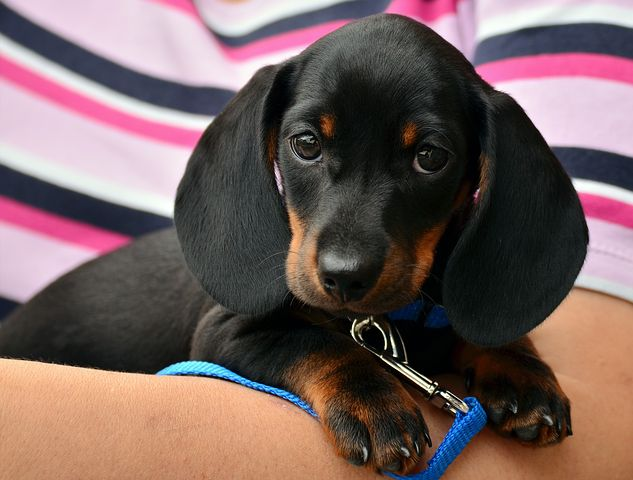

dachshund-1519374__480.jpg is a cat
[0.]


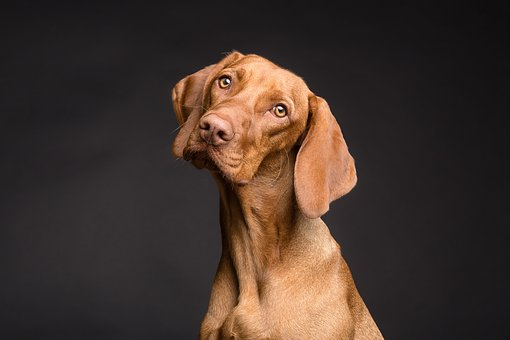

dog-3277416__340.jpg is a cat
[0.]


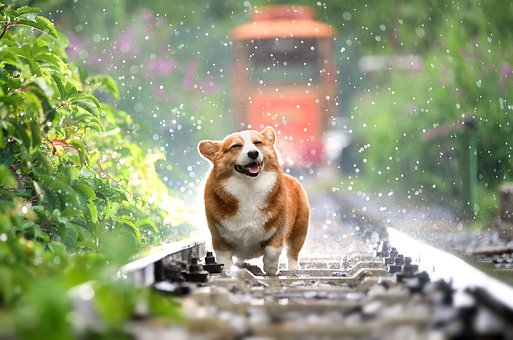

dog-4415649__340.jpg is a cat
[0.]


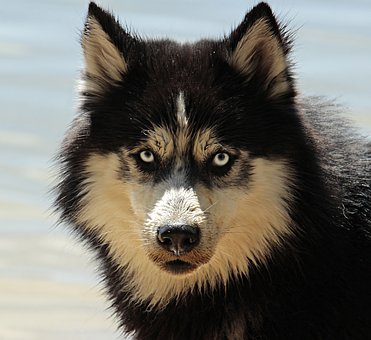

husky-3380548__340.jpg is a cat
[0.]


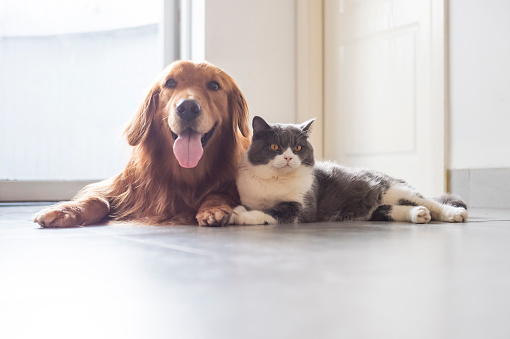

istockphoto-1159973303-170667a.jpg is a cat
[0.]


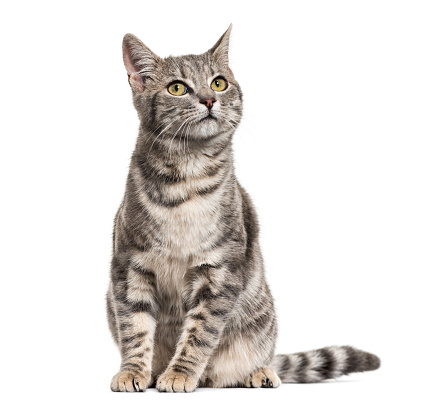

istockphoto-1217828258-170667a.jpg is a cat
[0.]


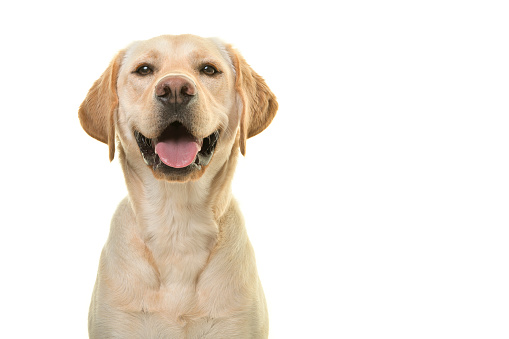

istockphoto-1251033537-170667a.jpg is a cat
[0.]


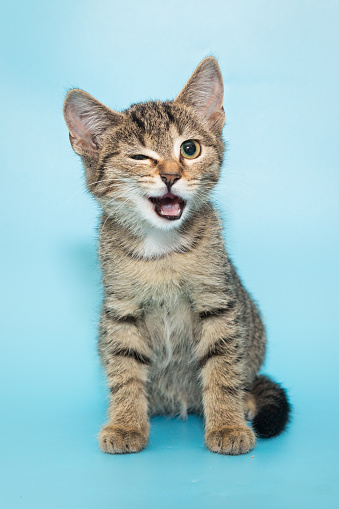

istockphoto-1267021092-170667a.jpg is a cat
[0.]


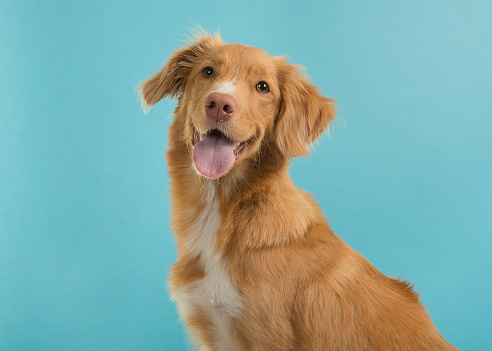

istockphoto-1273382787-170667a.jpg is a cat
[0.]


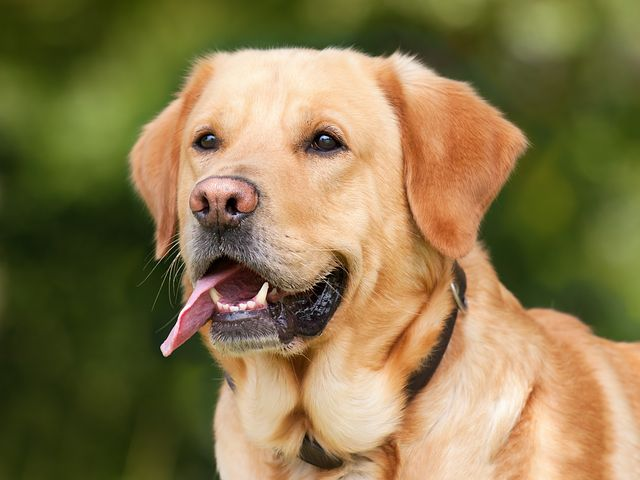

labrador-retriever-1210559__480.jpg is a cat
[0.]


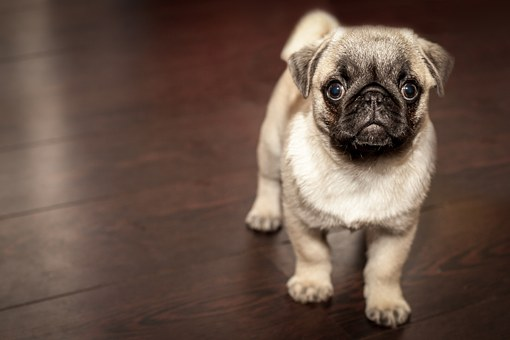

pug-690566__340.jpg is a cat
[0.]


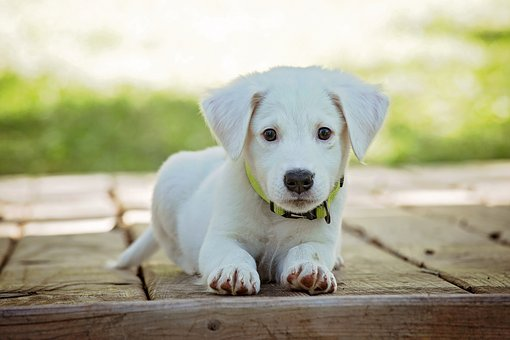

puppy-1903313__340.jpg is a cat
[0.]


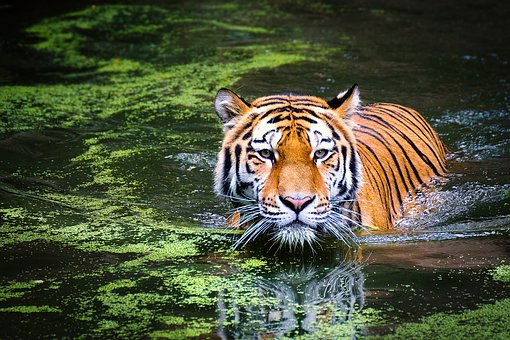

tiger-2535888__340.jpg is a cat
[0.]


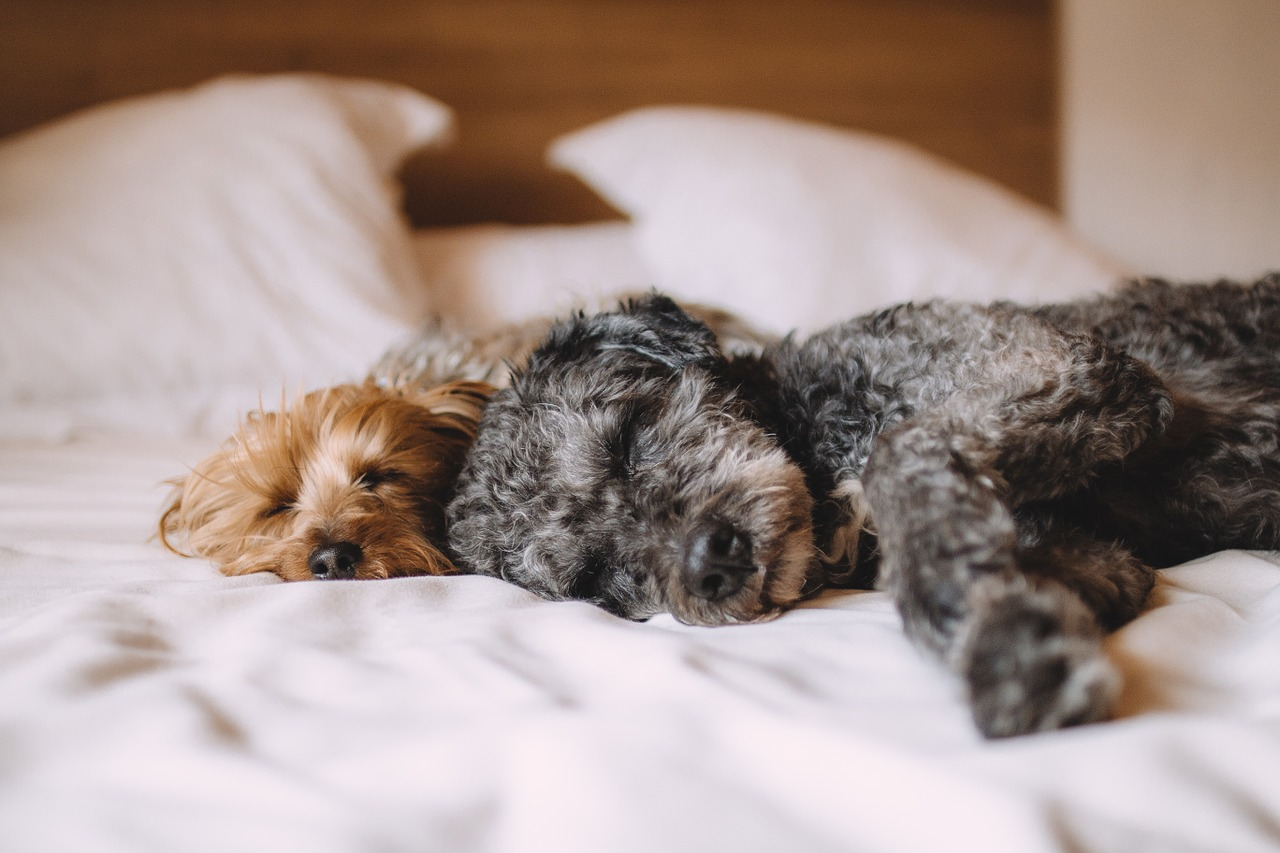

toughest.jpg is a cat


In [117]:
test = os.listdir('testforcatsvdogs')
for loc in test:
    img_path = os.path.join('testforcatsvdogs',loc)
    img = image.load_img(img_path, target_size=(150,150))
    sampleimage = image.img_to_array(img)
    sampleimage = np.expand_dims(sampleimage, axis=0)
    images = np.vstack([sampleimage])
    classes = transfer_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        display(Image(filename=img_path))
        print (loc + ' is a dog')
    else:
        display(Image(filename=img_path))
        print (loc + ' is a cat')
        

In [131]:
!wget --no-check-certificate \ https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \ rps.zip

--2021-08-27 22:03:55--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
--2021-08-27 22:03:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.183.144, 142.250.183.176, 142.250.183.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.183.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: 'rps.zip'

     0K .......... .......... .......... .......... ..........  0%  860K 3m48s
    50K .......... .......... .......... .......... ..........  0% 1.59M 2m54s
   100K .......... .......... .......... .......... ..........  0% 3.24M 2m16s
   150K .......... .......... .......... .......... ..........  0% 3.61M 1m55s
   200K .......... .......... .......... .......... ..........  0% 2.93M 1m45s
   250K .......... .......... .......... .........

  6650K .......... .......... .......... .......... ..........  3% 6.05M 36s
  6700K .......... .......... .......... .......... ..........  3% 9.12M 36s
  6750K .......... .......... .......... .......... ..........  3% 20.1M 36s
  6800K .......... .......... .......... .......... ..........  3% 5.50M 36s
  6850K .......... .......... .......... .......... ..........  3% 16.5M 36s
  6900K .......... .......... .......... .......... ..........  3% 6.68M 36s
  6950K .......... .......... .......... .......... ..........  3% 15.8M 35s
  7000K .......... .......... .......... .......... ..........  3% 8.31M 35s
  7050K .......... .......... .......... .......... ..........  3% 19.4M 35s
  7100K .......... .......... .......... .......... ..........  3% 9.57M 35s
  7150K .......... .......... .......... .......... ..........  3% 9.88M 35s
  7200K .......... .......... .......... .......... ..........  3% 6.89M 35s
  7250K .......... .......... .......... .......... ..........  3% 20.7M 35s

 99450K .......... .......... .......... .......... .......... 50% 19.3M 13s
 99500K .......... .......... .......... .......... .......... 50% 13.8M 13s
 99550K .......... .......... .......... .......... .......... 50% 6.64M 13s
 99600K .......... .......... .......... .......... .......... 50% 13.0M 13s
 99650K .......... .......... .......... .......... .......... 50% 12.0M 13s
 99700K .......... .......... .......... .......... .......... 50% 12.6M 13s
 99750K .......... .......... .......... .......... .......... 50% 8.03M 13s
 99800K .......... .......... .......... .......... .......... 50% 5.92M 13s
 99850K .......... .......... .......... .......... .......... 50% 5.97M 13s
 99900K .......... .......... .......... .......... .......... 51% 16.5M 13s
 99950K .......... .......... .......... .......... .......... 51% 18.8M 13s
100000K .......... .......... .......... .......... .......... 51% 12.4M 13s
100050K .......... .......... .......... .......... .......... 51% 3.36M 13s

124400K .......... .......... .......... .......... .......... 63% 4.01M 10s
124450K .......... .......... .......... .......... .......... 63% 12.1M 10s
124500K .......... .......... .......... .......... .......... 63% 14.5M 10s
124550K .......... .......... .......... .......... .......... 63% 10.4M 10s
124600K .......... .......... .......... .......... .......... 63% 5.48M 10s
124650K .......... .......... .......... .......... .......... 63% 5.44M 10s
124700K .......... .......... .......... .......... .......... 63% 20.1M 10s
124750K .......... .......... .......... .......... .......... 63% 12.9M 10s
124800K .......... .......... .......... .......... .......... 63% 6.24M 10s
124850K .......... .......... .......... .......... .......... 63% 14.4M 9s
124900K .......... .......... .......... .......... .......... 63% 12.0M 9s
124950K .......... .......... .......... .......... .......... 63% 17.6M 9s
125000K .......... .......... .......... .......... .......... 63% 3.31M 9s
125

In [132]:
!wget --no-check-certificate \ https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \ rps-test.zip

--2021-08-27 22:04:31--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
--2021-08-27 22:04:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.183.144, 142.250.183.176, 142.250.183.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.183.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: 'rps-test-set.zip'

     0K .......... .......... .......... .......... ..........  0%  836K 34s
    50K .......... .......... .......... .......... ..........  0% 1.44M 27s
   100K .......... .......... .......... .......... ..........  0% 3.18M 21s
   150K .......... .......... .......... .......... ..........  0% 2.00M 19s
   200K .......... .......... .......... .......... ..........  0% 3.98M 17s
   250K .......... .......... .......... ...

  5350K .......... .......... .......... .......... .......... 18% 26.7M 3s
  5400K .......... .......... .......... .......... .......... 18% 5.91M 3s
  5450K .......... .......... .......... .......... .......... 19% 18.1M 3s
  5500K .......... .......... .......... .......... .......... 19% 8.25M 3s
  5550K .......... .......... .......... .......... .......... 19% 7.06M 3s
  5600K .......... .......... .......... .......... .......... 19% 21.6M 3s
  5650K .......... .......... .......... .......... .......... 19% 4.58M 3s
  5700K .......... .......... .......... .......... .......... 19% 8.15M 3s
  5750K .......... .......... .......... .......... .......... 20% 6.82M 3s
  5800K .......... .......... .......... .......... .......... 20% 9.25M 3s
  5850K .......... .......... .......... .......... .......... 20% 20.2M 3s
  5900K .......... .......... .......... .......... .......... 20% 6.04M 3s
  5950K .......... .......... .......... .......... .......... 20% 22.0M 3s
  6000K ....

In [133]:
!wget --no-check-certificate \ https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip \ rps-validation.zip

--2021-08-27 22:05:45--  http://%5C/
Resolving \\ (\\)... failed: No such host is known. .
wget: unable to resolve host address '\\'
--2021-08-27 22:05:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.183.144, 142.250.183.176, 142.250.183.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.183.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6623597 (6.3M) [application/zip]
Saving to: 'rps-validation.zip'

     0K .......... .......... .......... .......... ..........  0% 1005K 6s
    50K .......... .......... .......... .......... ..........  1% 2.09M 5s
   100K .......... .......... .......... .......... ..........  2% 1.68M 4s
   150K .......... .......... .......... .......... ..........  3% 13.7M 3s
   200K .......... .......... .......... .......... ..........  3% 2.51M 3s
   250K .......... .......... .......... ....

In [134]:
zipfile.ZipFile('rps.zip','r').extractall()
zipfile.ZipFile('rps-test-set.zip','r').extractall()
zipfile.ZipFile('rps-validation.zip','r').extractall()

In [145]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=40
)
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
train_generator = train_datagen.flow_from_directory(
    'rps',
    class_mode='categorical',
    target_size=(150,150),
    batch_size=25
)
validation_generator = validation_datagen.flow_from_directory(
    'rps-test-set',
    class_mode='categorical',
    target_size=(150,150),
    batch_size=31
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [141]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(3,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=1e-4),metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_211 (Conv2D)          (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 33, 33, 128)      

In [142]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>0.999:
            print('\nStopped')
            self.model.stop_training=True
callbacks = myCallback()

In [144]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=12,
    verbose = 2,
    epochs=100,
    callbacks=[callbacks]
)

Epoch 1/100
100/100 - 160s - loss: 1.0569 - accuracy: 0.4224 - val_loss: 0.9737 - val_accuracy: 0.4086
Epoch 2/100
100/100 - 175s - loss: 0.7611 - accuracy: 0.6629 - val_loss: 0.3684 - val_accuracy: 0.8548
Epoch 3/100
100/100 - 241s - loss: 0.5306 - accuracy: 0.7968 - val_loss: 0.8715 - val_accuracy: 0.6559
Epoch 4/100
100/100 - 239s - loss: 0.4106 - accuracy: 0.8449 - val_loss: 0.1726 - val_accuracy: 0.9543
Epoch 5/100
100/100 - 246s - loss: 0.3330 - accuracy: 0.8818 - val_loss: 0.2915 - val_accuracy: 0.8978
Epoch 6/100
100/100 - 223s - loss: 0.2893 - accuracy: 0.9034 - val_loss: 0.2815 - val_accuracy: 0.8844
Epoch 7/100
100/100 - 280s - loss: 0.2297 - accuracy: 0.9214 - val_loss: 0.1508 - val_accuracy: 0.9462
Epoch 8/100
100/100 - 258s - loss: 0.2107 - accuracy: 0.9319 - val_loss: 0.2169 - val_accuracy: 0.9274
Epoch 9/100


ResourceExhaustedError:  MemoryError: Unable to allocate 25.7 MiB for an array with shape (25, 300, 300, 3) and data type float32
Traceback (most recent call last):

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 961, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 837, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 963, in generator_fn
    yield x[i]

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\vaibh\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\iterator.py", line 222, in _get_batches_of_transformed_samples
    batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=self.dtype)

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 25.7 MiB for an array with shape (25, 300, 300, 3) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_105875]

Function call stack:
train_function


In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = len(acc)
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

In [ ]:
test = os.listdir('rps-validation')
for loc in test:
    img_path = os.path.join('rps-validation',loc)
    img = image.load_img(img_path, target_size=(300,300))
    sampleimage = image.img_to_array(img)
    sampleimage = np.expand_dims(sampleimage, axis=0)
    images = np.vstack([sampleimage])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
        

In [ ]:
acc = his